# Getting Started With Matplotlib

[back to overview page](index.ipynb)

This page is about the general mechanics of plotting with [Matplotlib](http://matplotlib.org/), not so much about the plots themselves.
For more information about those, have a look at the [overview page](index.ipynb) and especially at the [external links section](index.ipynb#External-Links).

## Outdated Information

Matplotlib has been very actively developed in the last few years.
Many improvements have been made and the API as well as the recommended usage patterns have changed quite a bit.

Sadly, this also means that a lot of documentation out there is outdated and may actually, although well intended, be bad advice.
In fact, this very page may be outdated at the time you are reading it!
Have a look at this date:

In [1]:
!date +%F

2022-09-17


This is the date of the last change to this page.
If it's older then half a year or a year, it is very likely to be outdated, so don't read it!

## Initial Setup

You should create a file named `matplotlibrc`
in the same directory as your notebook file(s),
containing this line:

    figure.dpi: 96

For more details, see [Default Values for Matplotlib's "inline" backend](matplotlib-inline-defaults.ipynb).

## Plotting Step by Step

There are several different ways of using Matplotlib, here we provide mainly slow-paced step-by-step instructions that show explicitly what has to be done in order to create a plot.

These instructions should help you to create your own individualized plotting functions (see below).

You can also use Matplotlib in a much less explicit and quicker-to-type way called "pylab" (see further below).

### Importing Matplotlib

There are several ways to do that, some of which are *not recommended* anymore (especially `from pylab import *`).

As far as I know, this is the canonical and recommended way to import Matplotlib for most use cases:

In [2]:
import matplotlib.pyplot as plt

For some specialized cases, you can also import specific classes from certain `matplotlib` sub-modules, e.g.

    from matplotlib.patches import Polygon, Ellipse
    from matplotlib.colors import LinearSegmentedColormap

There are lots of code examples out there that still use them, but the following imports are [not recommended anymore](https://matplotlib.org/3.6.0/api/index.html#module-pylab) and you should **never use any of these**:

<pre style="color:gray">
from pylab import *
from matplotlib.pyplot import *
</pre>

### A Quick Plot

If you are in a hurry and just need to plot a few values ...

In [3]:
data = 4, 8, 15, 16, 23, 42

... you can do it like this:

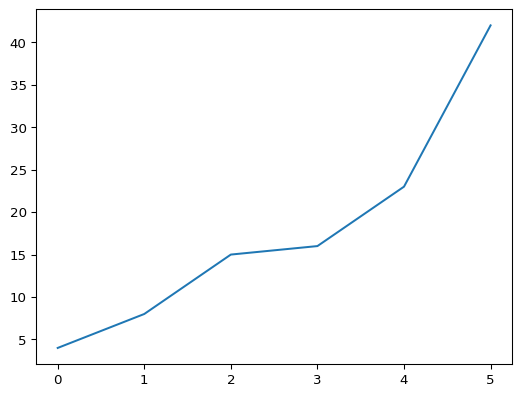

In [4]:
plt.plot(data);

This does multiple steps at once, which is convenient for quick plots.
For more complicated plotting needs, it is better to have more explicit control about figures, axes and so on.
The following sections go into more detail about the different steps that are necessary to produce a plot.

### Creating a `Figure` and One or More `Axes` Objects

Before plotting anything, a [Figure object](http://matplotlib.org/api/figure_api.html)
has to be created.
Some commands handle figure creation and selection automatically (like the example above),
but it normally makes your code easier to read if you create figures explicitly.

A figure typically contains one or more
[Axes objects](http://matplotlib.org/api/axes_api.html).
Most plotting commands work on those.

You can create a figure and a single axes object with a single command like this:

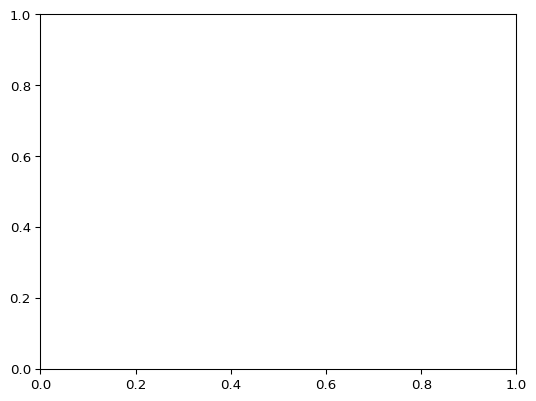

In [5]:
fig, ax = plt.subplots()

There are many options you can pass to
[plt.subplots()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots)
in order to customize things, have a look at the documentation of
[plt.figure()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.figure),
[add_subplot()](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot)
and [GridSpec](http://matplotlib.org/api/gridspec_api.html#matplotlib.gridspec.GridSpec).

If you want more than one `Axes` object, you can specify rows and columns of subplots:

    fig, (ax1, ax2) = plt.subplots(1, 2)

If you want, you can also use
[plt.figure()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.figure)
to create a figure object first, and then use
[add_axes()](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_axes)
and/or
[add_subplot()](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot)
to add axes objects.

If you want to continue plotting on the previously used `Axes` object, you can use [plt.gca()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.gca) (= *get current axes*).
If no axes object exists, this command creates one for you (it also creates a figure object, if needed).

Each figure has a (possibly empty) list of references to all its `Axes` objects ...

In [6]:
fig.axes

[<AxesSubplot: >]

Obviously, our example figure has one `Axes` object (the one we got from `plt.subplots()` above).

In [7]:
fig.axes[0] is ax

True

Each `Axes` object has a reference to its (exactly one) parent figure:

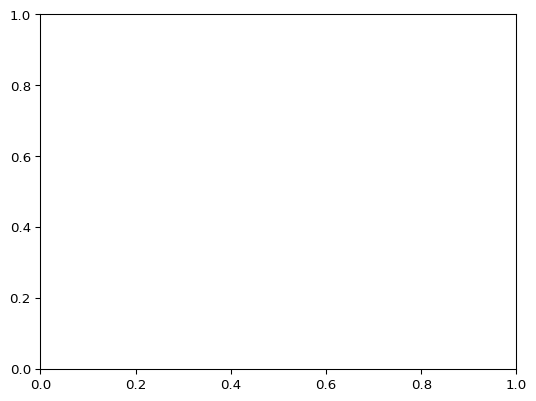

In [8]:
ax.figure

So don't worry if you misplace your figure reference, you can always get it from any contained `Axes` object.

In [9]:
ax.figure is fig

True

### Plotting Data

Once we have an `Axes` object, we can plot data onto it.
There are many types of plots
(have a look at the [`Axes` documentation](http://matplotlib.org/api/axes_api.html)),
here we'll just create a very simple plot consisting of two lines.
Note that when plotting a two-dimensional array of data,
each column is used to create a separate line in the plot.

In [10]:
ax.plot([[42, 40],
         [22, 20],
         [32, 30]])

As you can see, this returns a list of objects (in our case it's two lines).
You can use those objects for fine-tuning the plot and you can also get a reference to the `Axes` object they belong to:

In [11]:
_[0].axes is ax

True

> In case you didn't know: The underscore "`_`" is a special variable name that is set by the interactive Python interpreter to the result of the last expression of the previously executed code cell.

If you don't need the returned list, you can hide it by appending a semicolon (this is only necessary in the last line of a code cell).
Let's plot again into the same axes (keeping the previous plot):

In [12]:
ax.plot(data);

Note that mentioning the figure object a few cells above led to the plot being displayed in the cell output.
The `plot()` command in the previous cell, however, didn't show the plot.

Normally, you would create a figure and produce one or more plots in the same code cell.
But if you want to show the same figure again in a later cell, just mention the figure object again:

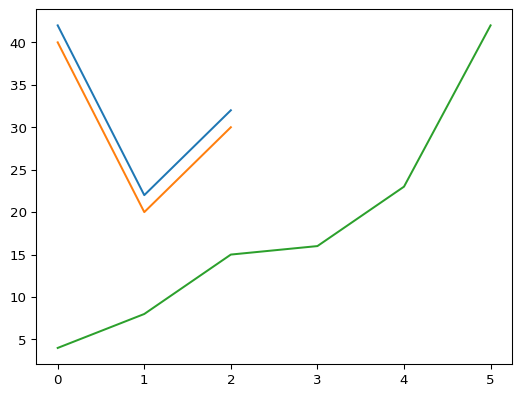

In [13]:
fig

Alternatively, you can use IPython's built-in `display()` function:

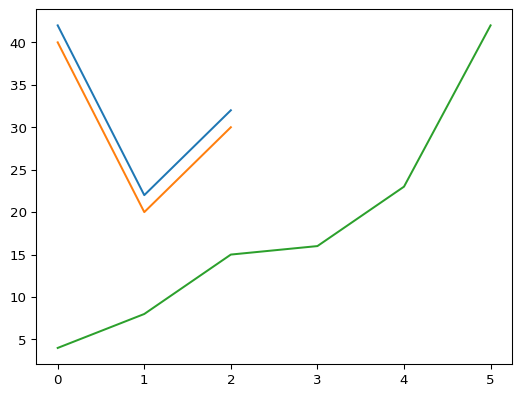

In [14]:
display(fig)

### Plotting to a File

Analyzing your data in the notebook is nice,
but you probably also want to save the plot in a separate image file.
It's very easy to
[save a figure to a file](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.savefig),
e.g. a PNG file:

In [15]:
fig.savefig('my_plot.png')

This creates a file named [my_plot.png](my_plot.png) in the current directory.
You can choose the file type by means of the file extension:

    fig.savefig('my_plot.svg')
    fig.savefig('my_plot.pdf')
    fig.savefig('my_plot.eps')

You can [save multiple figures to one PDF file with `PdfPages`](http://matplotlib.org/faq/howto_faq.html#save-multiple-plots-to-one-pdf-file).

It is also possible to [create PGF files for use in LaTeX documents](http://matplotlib.org/users/pgf.html):

    fig.savefig('my_plot.pgf')

The available image formats depend on the backend, you can get a list for the currently selected backend:

In [16]:
fig.canvas.get_supported_filetypes_grouped()

{'Encapsulated Postscript': ['eps'],
 'Joint Photographic Experts Group': ['jpeg', 'jpg'],
 'Portable Document Format': ['pdf'],
 'PGF code for LaTeX': ['pgf'],
 'Portable Network Graphics': ['png'],
 'Postscript': ['ps'],
 'Raw RGBA bitmap': ['raw', 'rgba'],
 'Scalable Vector Graphics': ['svg', 'svgz'],
 'Tagged Image File Format': ['tif', 'tiff'],
 'WebP Image Format': ['webp']}

### Different Backends

Speaking of which, Matplotlib supports different backends.
In the examples above, we were using the "inline" backend, which is the default (since `ipykernel` version 4.4, see [PR #159](https://github.com/ipython/ipykernel/pull/159)).
This shows the plots in the notebook itself, right after the code cells that produce the plots.

If you prefer a separate window for the plots,
you can use this
["magic" command](http://ipython.org/ipython-doc/stable/interactive/magics.html#magic-matplotlib):

In [17]:
%matplotlib

Using matplotlib backend: <object object at 0x7f8518576170>


In [18]:
fig, ax = plt.subplots()
ax.plot(data);

After executing the above cell, the plot window should open immediately.
Note that if you are using Matplotlib in a plain Python script,
you'll have to call
[plt.show()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show)
in order to actually open the plot window, see also http://matplotlib.org/faq/howto_faq.html#use-show.

The effects of the `Axes`'s methods are immediately visible in the plot window, e.g.:

In [19]:
ax.plot(data[::-1]);

In [20]:
ax.grid()

If you are using Matplotlib (non-interactively) from a plain Python script,
you'll have to use `fig.canvas.draw()` (or `plt.draw()`) to update the current figure.

If you want to open a new window, just create a new figure object:

In [21]:
fig2, ax2 = plt.subplots()
ax2.plot(data + data[::-1]);

If you keep references to the figure/axes objects, you can update previous plots
(as long as you don't close their window).

In [22]:
ax.grid()

There are many plotting backends,
some Jupyter extensions even provide their own backend.
You can list all available backends like this:

In [23]:
%matplotlib -l

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


Switching backends might require restarting the kernel in some cases, but switching back and forth between one external backend and the "inline" backend should work immediately.

To switch back to the "inline" backend, just use:

    %matplotlib inline

### Closing a Plot

Matplotlib keeps references to all figures and even if you close all plot windows and delete all your own references, the figures are still kept in memory.

To release all resources for the current figure, use:

In [24]:
plt.close()

To close all figures, use:

In [25]:
plt.close('all')

Note that [plt.clf()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.clf)
and [plt.cla()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.cla)
clear the current figure and axes, respectively,
but they don't reset the parameters (e.g. figure size)
and they don't free all resources.

Let's switch back to the "inline" backend now:

In [26]:
%matplotlib inline

## Advice: Write Your Own Plotting Function!

You will most likely not just plot once and then move on.
More realistically, you'll plot many times while exploring your data and changing some parameters in your calculations.

Depending on the task at hand, you'll have certain requirements regarding axis scaling, tick marks, labels etc.

Instead of repeating the same commands again and again,
you should write an individualized plotting function (or more likely: several plotting functions).
Here's an example:

In [27]:
import matplotlib.pyplot as plt
import numpy as np


def myplot(data, ax=None):
    """A special plotting function for my special needs."""
    if ax is None:
        ax = plt.gca()
    x = np.arange(len(data)) * 1000  # my special x-axis needs
    lines = ax.plot(x, data)
    ax.set_xlabel("my independent variable / millisomethings")
    ax.set_ylabel("very interesting unitless values")
    ax.grid(True)
    return lines

Note that this function accepts an optional `ax` argument
(as recommended by the [official FAQ](http://matplotlib.org/faq/usage_faq.html#coding-styles)),
where an existing `Axes` object can be passed to be drawn on.
By default, the current `Axes` object is used.
If none exists, a new figure with a new `Axes` object is created automatically.
All this is done by [plt.gca()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.gca)
(= *get current axes*).

You should think about what is most useful to be returned from this function,
in this example it just passes through the list of lines returned by
[plot()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot).

Note that `show()` is not used within the function, as this might not be desired,
e.g. if we only want to plot to a file and we don't want to show the plot window.
If we use "interactive" mode (which is enabled by default in a Jupyter notebook),
it isn't necessary anyway.

The custom plotting function can be used like this:

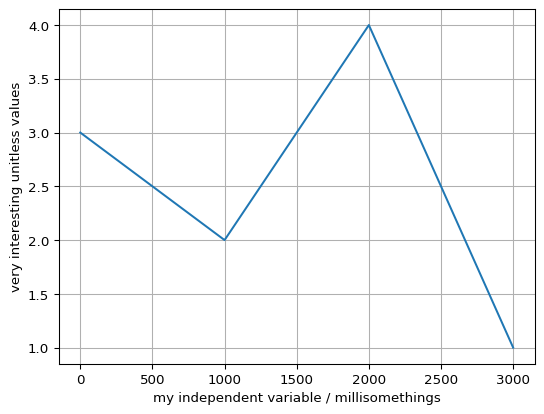

In [28]:
myplot([3, 2, 4, 1]);

By means of the optional `ax` argument it can also be used in more complicated settings, e.g.:

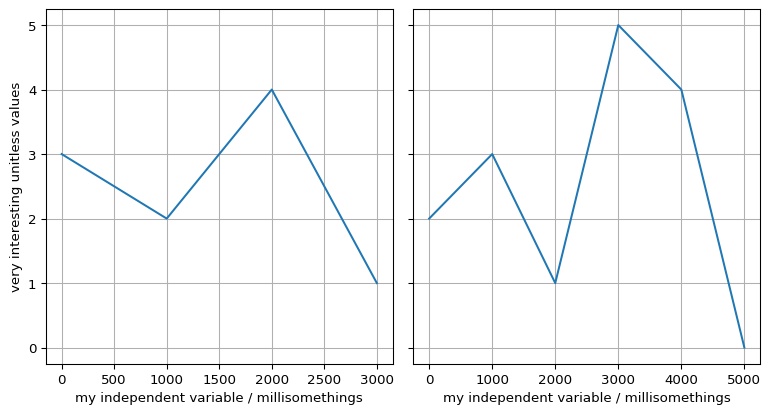

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(fig.get_figwidth() * 1.5)
fig.subplots_adjust(wspace=0.06)
myplot([3, 2, 4, 1], ax=ax1)
myplot([2, 3, 1, 5, 4, 0], ax=ax2)
ax2.set_ylabel('');

Of course it's also possible to fine-tune the plotting style in every detail,
but this is beyond the scope of this little notebook.
See https://matplotlib.org/tutorials/introductory/customizing.html for more information.

## Finally: The Quick and Dirty Way

The above examples are quite explicit (which is good) and a bit verbose (which might be tedious).

If you just want to quickly fire up an IPython console and make some spontaneous throw-away plots, you can use the so-called "pylab" mode using [the "magic" command](http://ipython.org/ipython-doc/stable/interactive/magics.html#magic-pylab)

    %pylab

or

    %pylab inline
    
This injects a whole lot of convenience functions into the current namespace.
That means you don't need to write any `import` statements and you can use the functions without the `plt.` and `np.` prefixes, e.g.:

    plot(arange(100)**2);

This should significantly reduce the number of characters you have to type (at least on the short term).
However, this is not recommended if you want to keep your code, because the resulting code is hard to read for others (and for future you) and [it may cause some subtle errors](http://nbviewer.ipython.org/github/Carreau/posts/blob/master/10-No-PyLab-Thanks.ipynb).

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>